In [321]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [322]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [323]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set() # seaborn 속성을 기본값으로 설정

In [324]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

In [325]:
print(len(train[train['Category'].isnull()]))
train = train[train['Category'].isnull() == False]
print(len(train[train['Category'].isnull()]))
print(len(test))

0
0
884262


데이터 처리를 어떻게 해야할까?

In [326]:
test.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


test에는 Category, Descript, Resolution이 없다...
제출해야 하는 값은 Category의 one-hot encoding 값이다.
Descript와 Resolution은 test에 없으므로 일단 필요없는 값으로 판단된다.

In [327]:
train.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

Category는 총 39개 타입으로 sampleSubmission.csv에 있는 열의 이름들과 동일하다.

In [328]:
train['Category'].unique().size

39

In [329]:
train['Category'].unique()

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING',
       'SEX OFFENSES NON FORCIBLE', 'EXTORTION', 'GAMBLING', 'BAD CHECKS',
       'TREA', 'RECOVERED VEHICLE', 'PORNOGRAPHY/OBSCENE MAT'],
      dtype=object)

Category항목들과 sampleSubmission의 항목들이 완전히 일치하는지 확인

In [330]:
a = train['Category'].unique()
b = "ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,EXTORTION,FAMILY OFFENSES,FORGERY/COUNTERFEITING,FRAUD,GAMBLING,KIDNAPPING,LARCENY/THEFT,LIQUOR LAWS,LOITERING,MISSING PERSON,NON-CRIMINAL,OTHER OFFENSES,PORNOGRAPHY/OBSCENE MAT,PROSTITUTION,RECOVERED VEHICLE,ROBBERY,RUNAWAY,SECONDARY CODES,SEX OFFENSES FORCIBLE,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS"
b = b.split(',')
print(b)
b3 = []
for bb in b:
    b3.append(bb.strip())
print(len(b3), b3)
a.sort()
assert len(a) == len(b3)
for i in range(len(a)):
    if a[i] != b3[i]:
        print("Error!!! : ", a[i], "and", b3[i], " not same!")

        

['ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY', 'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE', 'DRUG/NARCOTIC', 'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION', 'FAMILY OFFENSES', 'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING', 'KIDNAPPING', 'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING', 'MISSING PERSON', 'NON-CRIMINAL', 'OTHER OFFENSES', 'PORNOGRAPHY/OBSCENE MAT', 'PROSTITUTION', 'RECOVERED VEHICLE', 'ROBBERY', 'RUNAWAY', 'SECONDARY CODES', 'SEX OFFENSES FORCIBLE', 'SEX OFFENSES NON FORCIBLE', 'STOLEN PROPERTY', 'SUICIDE', 'SUSPICIOUS OCC', 'TREA', 'TRESPASS', 'VANDALISM', 'VEHICLE THEFT', 'WARRANTS', 'WEAPON LAWS']
39 ['ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY', 'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE', 'DRUG/NARCOTIC', 'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION', 'FAMILY OFFENSES', 'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING', 'KIDNAPPING', 'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING', 'MISSING PERSON', 'NON-CRIMINAL', 'OTHER OFFENSES', 'PORNOGRAPHY/OB

Test에 없는 Descript, Resolution 항목을 삭제한다.

In [331]:
if 'Descript' in train:
    train = train.drop(['Descript'], axis=1)
if 'Resolution' in train:
    train = train.drop(['Resolution'], axis=1)
train.head()

,Dates,Category,DayOfWeek,PdDistrict,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541


In [332]:
test.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


### 시간값 변경

문자열로 되어 있는 시간값을 pandas datetime으로 변경하고, 날짜와 시간값을 별개의 feature로 생성한다.

In [333]:
# train['Dates'] = pd.to_datetime(train['Dates'])
# test['Dates'] = pd.to_datetime(test['Dates'])

def rebuild_datetime(df):
    df['Dates'] = pd.to_datetime(df['Dates'])
    df['Date'] = df['Dates'].dt.date
    df['Hour'] = df['Dates'].dt.hour
    return df

train = rebuild_datetime(train)
test = rebuild_datetime(test)

print("wrong Dates(train):", len(train[train['Dates'].isnull()]))
print("wrong Dates(test):", len(test[test['Dates'].isnull()]))


wrong Dates(train): 0
wrong Dates(test): 0


In [334]:
print(train[['Dates', 'Date', 'Hour']].head(n=10))
print(test[['Dates', 'Date', 'Hour']].head(n=10))

                Dates        Date  Hour
0 2015-05-13 23:53:00  2015-05-13    23
1 2015-05-13 23:53:00  2015-05-13    23
2 2015-05-13 23:33:00  2015-05-13    23
3 2015-05-13 23:30:00  2015-05-13    23
4 2015-05-13 23:30:00  2015-05-13    23
5 2015-05-13 23:30:00  2015-05-13    23
6 2015-05-13 23:30:00  2015-05-13    23
7 2015-05-13 23:30:00  2015-05-13    23
8 2015-05-13 23:00:00  2015-05-13    23
9 2015-05-13 23:00:00  2015-05-13    23
                Dates        Date  Hour
0 2015-05-10 23:59:00  2015-05-10    23
1 2015-05-10 23:51:00  2015-05-10    23
2 2015-05-10 23:50:00  2015-05-10    23
3 2015-05-10 23:45:00  2015-05-10    23
4 2015-05-10 23:45:00  2015-05-10    23
5 2015-05-10 23:40:00  2015-05-10    23
6 2015-05-10 23:30:00  2015-05-10    23
7 2015-05-10 23:30:00  2015-05-10    23
8 2015-05-10 23:10:00  2015-05-10    23
9 2015-05-10 23:10:00  2015-05-10    23


X, Y gps 값을 출력해 보자.

In [335]:
from shapely.geometry import Point
import geopandas as gpd

def create_gdf(df):
    gdf = df.copy()
    gdf['Coordinates'] = list(zip(gdf.X, gdf.Y))
    gdf.Coordinates = gdf.Coordinates.apply(Point)
    gdf = gpd.GeoDataFrame(
        gdf, geometry='Coordinates', crs={'init': 'epsg:4326'})
    return gdf

def create_and_show_gdf(df):
    df_gdf = create_gdf(df)

    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    ax = world.plot(color='white', edgecolor='black')
    df_gdf.plot(ax=ax, color='red')
    plt.show()

잘못된 GPS좌표값이 있어서 수정이 필요하다.
PdDistrict가 같은 값들의 평균값을 넣어서 해결한다.
(버릴 수도 있지만 test의 경우 값이 틀어지기 때문에 문제다.)

In [340]:
wrongxycnt = lambda df : len(df[(df['X'] == -120.5) & (df['Y'] == 90.0)])
print(wrongxycnt(train))
print(wrongxycnt(test))

def fix_gps(df):
    cnt = 0
    d = df[(df['X'] == -120.5) & (df['Y'] == 90.0)]
    for idx, row in d.iterrows():
        district = row['PdDistrict']
        xys = df[df['PdDistrict'] == district][['X', 'Y']]
        #print("PdDistrict:", district)
        df.loc[idx, ['X']] = xys['X'].mean()
        df.loc[idx, ['Y']] = xys['Y'].mean()
        #print(df.loc[idx, ['X']].values[0], df.loc[idx, ['Y']].values[0])
        cnt = cnt + 1
    print('cnt', cnt)
    
def fix_gps_values():
    fix_gps(train)
    fix_gps(test)
    
def drop_wrong_gps(df):
    df = df.drop(df[df['X'] == -120.5].index)
    return df
    
fix_gps(train)
fix_gps(test)

print(wrongxycnt(train))
print(wrongxycnt(test))

0
0
cnt 0
cnt 0
0
0


In [338]:
print(train['Category'])

0                       WARRANTS
1                 OTHER OFFENSES
2                 OTHER OFFENSES
3                  LARCENY/THEFT
4                  LARCENY/THEFT
5                  LARCENY/THEFT
6                  VEHICLE THEFT
7                  VEHICLE THEFT
8                  LARCENY/THEFT
9                  LARCENY/THEFT
10                 LARCENY/THEFT
11                OTHER OFFENSES
12                     VANDALISM
13                 LARCENY/THEFT
14                  NON-CRIMINAL
15                  NON-CRIMINAL
16                       ROBBERY
17                       ASSAULT
18                OTHER OFFENSES
19                  NON-CRIMINAL
20                 LARCENY/THEFT
21                       ROBBERY
22                      WARRANTS
23                  NON-CRIMINAL
24                 LARCENY/THEFT
25                  NON-CRIMINAL
26                 LARCENY/THEFT
27                 LARCENY/THEFT
28                 LARCENY/THEFT
29                OTHER OFFENSES
          

Category에 따라 데이터 수를 세어 본다.

Text(0.5, 0, 'Percentage')

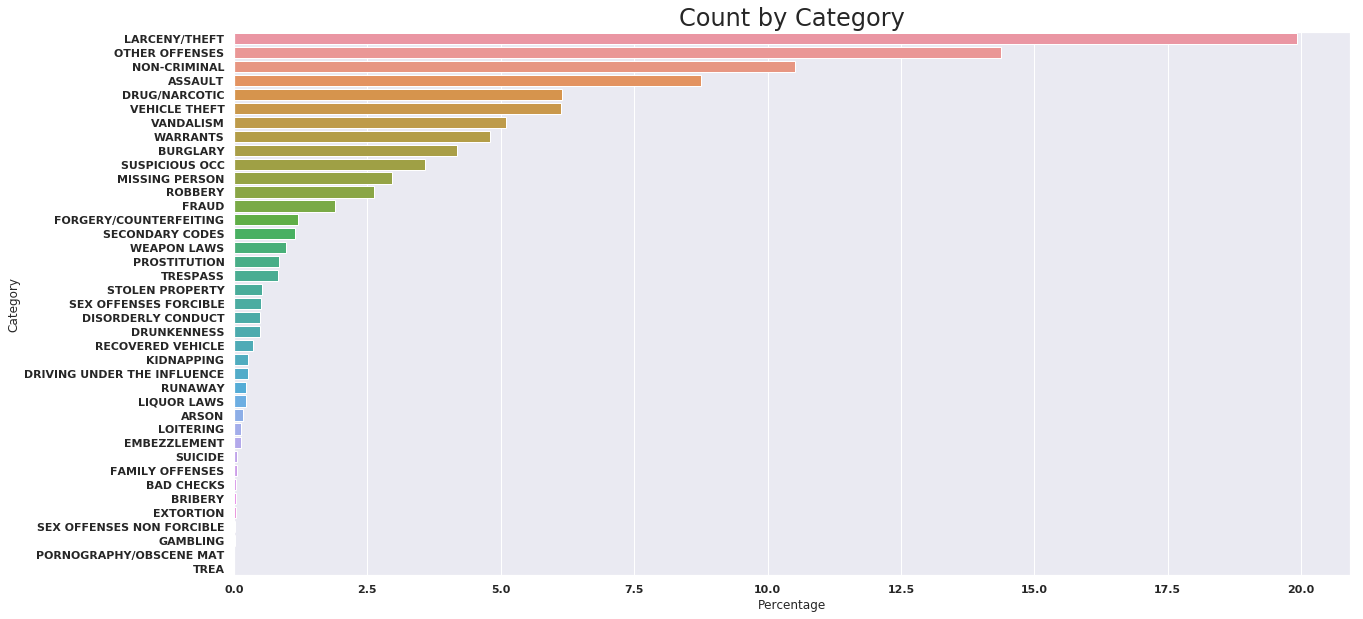

In [375]:
data = train.groupby('Category').count()
data = data['Dates'].sort_values(ascending=False)

plt.figure(figsize=(20, 12))
ax = sns.barplot((data.values / data.values.sum()) * 100,data.index)

plt.title('Count by Category', fontdict={'fontsize': 24})
plt.xlabel('Percentage')

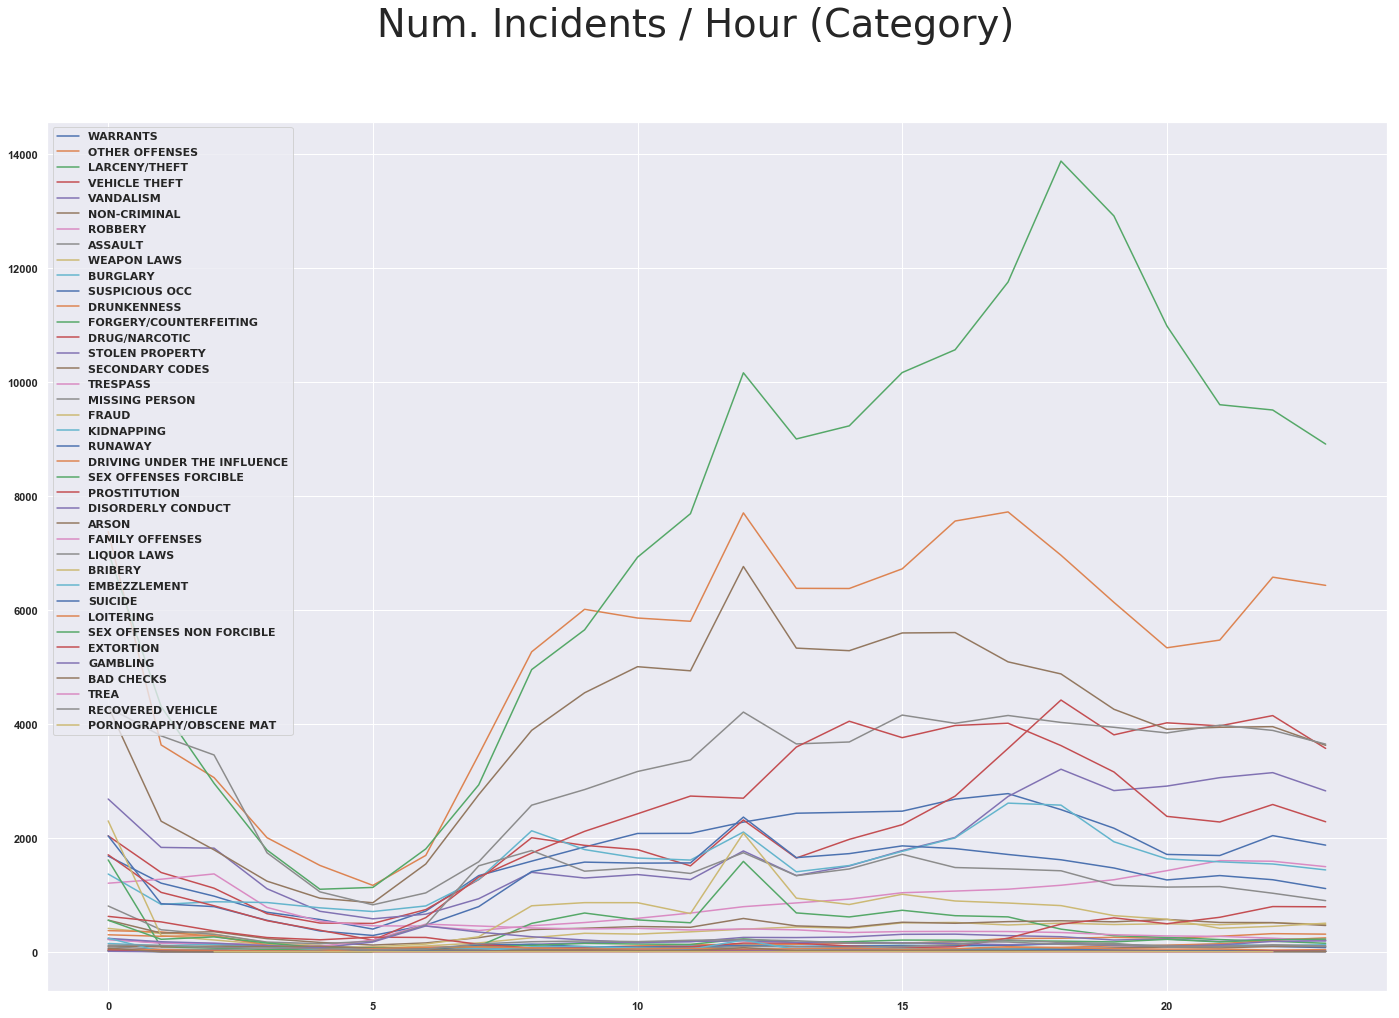

In [339]:
fig, ax = plt.subplots(figsize=(24,16))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 32}

import matplotlib
matplotlib.rc('font', **font)

fig.suptitle('Num. Incidents / Hour (Category)')
for category in train['Category'].unique():
    #print(category)
    data = train[train['Category'] == category].groupby('Hour')
    a = data['Hour'].count()
    ax.plot(a.index, data['Hour'].count(), label=category)
    
plt.legend()

plt.show()

['Wednesday' 'Tuesday' 'Monday' 'Sunday' 'Saturday' 'Friday' 'Thursday']


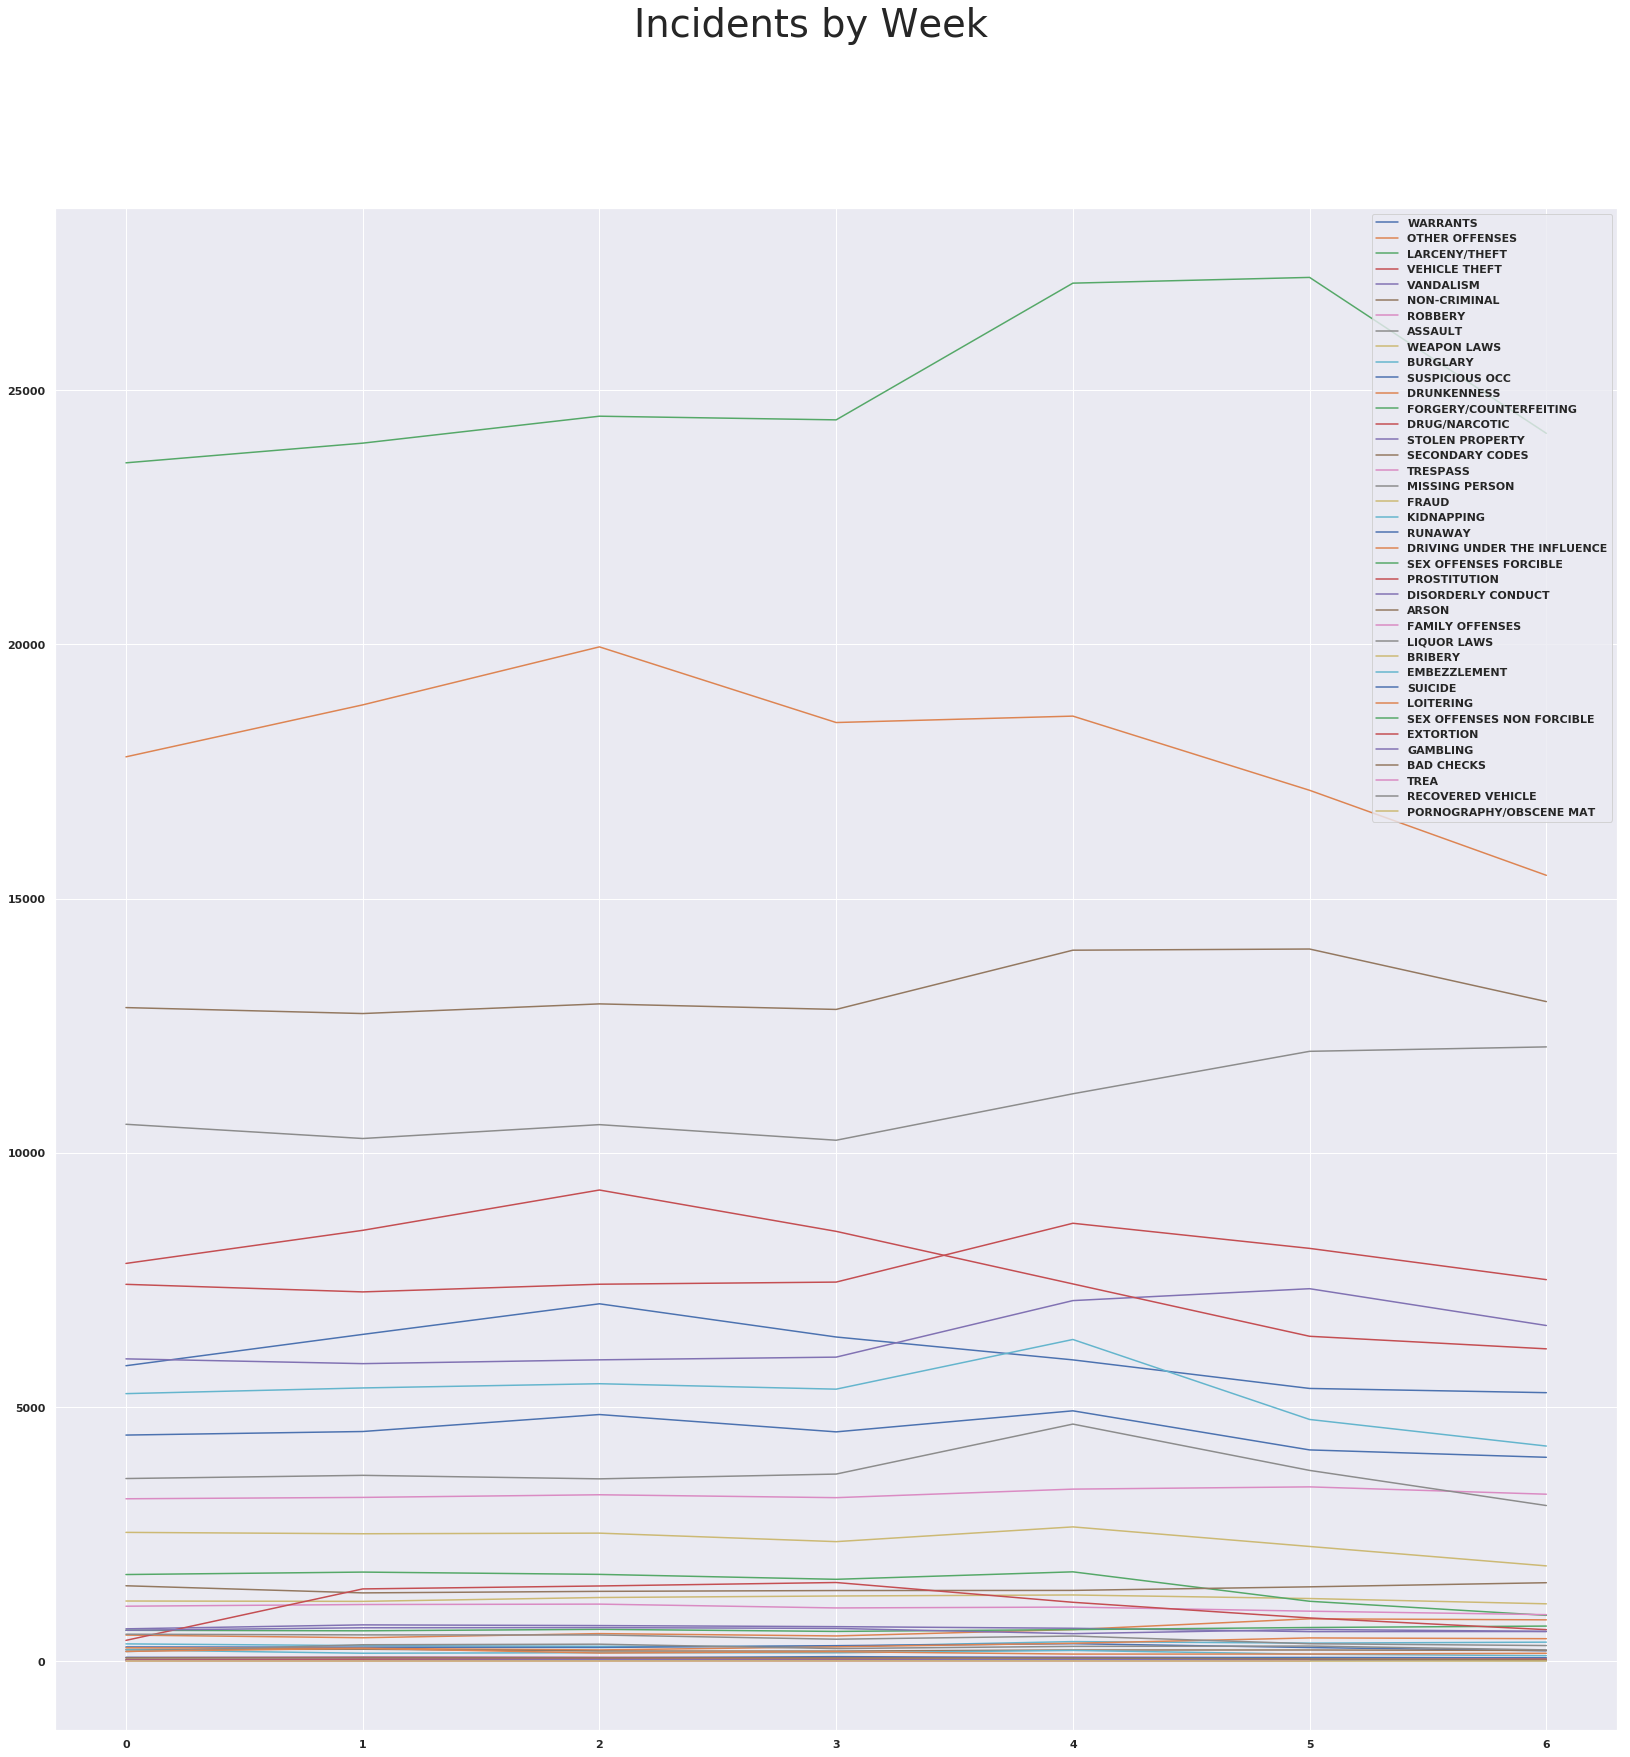

In [297]:
fig, ax = plt.subplots(figsize=(24,16))

import matplotlib
matplotlib.rc('font', **font)

print(train['DayOfWeek'].unique())

mapping = { 'Monday':0, 'Tuesday':1, 'Wednesday':2,  'Thursday':3, 'Friday':4, 'Saturday':5, 'Sunday':6}

df = train
df['DoWN'] = df['DayOfWeek'].map(mapping)

def plotbycol(df, col, title):
    fig.suptitle(title)
    for category in df['Category'].unique():
        #print(category)
        data = df[df['Category'] == category].groupby(col)
        a = data[col].count()
        ax.plot(a.index, data[col].count(), label=category)
    
    plt.legend()
    plt.show()
    
plotbycol(df, 'DoWN', "Incidents by Week")

좀 애매하다고 할 수 있겠다...

In [298]:
train['PdDistrict'].unique()

array(['NORTHERN', 'PARK', 'INGLESIDE', 'BAYVIEW', 'RICHMOND', 'CENTRAL',
       'TARAVAL', 'TENDERLOIN', 'MISSION', 'SOUTHERN'], dtype=object)

주소와 X,Y는 중복된 값으로 판단되므로 Address 삭제한다.

In [299]:
if 'Address' in train:
    train = train.drop(['Address'], axis=1)
    
if 'Address' in test:
    test = test.drop(['Address'], axis=1)

In [300]:
print(train.head())
print(test.head())

                Dates        Category  DayOfWeek PdDistrict           X  \
0 2015-05-13 23:53:00        WARRANTS  Wednesday   NORTHERN -122.425892   
1 2015-05-13 23:53:00  OTHER OFFENSES  Wednesday   NORTHERN -122.425892   
2 2015-05-13 23:33:00  OTHER OFFENSES  Wednesday   NORTHERN -122.424363   
3 2015-05-13 23:30:00   LARCENY/THEFT  Wednesday   NORTHERN -122.426995   
4 2015-05-13 23:30:00   LARCENY/THEFT  Wednesday       PARK -122.438738   

           Y        Date  Hour  DoWN  
0  37.774599  2015-05-13    23     2  
1  37.774599  2015-05-13    23     2  
2  37.800414  2015-05-13    23     2  
3  37.800873  2015-05-13    23     2  
4  37.771541  2015-05-13    23     2  
   Id               Dates DayOfWeek PdDistrict           X          Y  \
0   0 2015-05-10 23:59:00    Sunday    BAYVIEW -122.399588  37.735051   
1   1 2015-05-10 23:51:00    Sunday    BAYVIEW -122.391523  37.732432   
2   2 2015-05-10 23:50:00    Sunday   NORTHERN -122.426002  37.792212   
3   3 2015-05-10 23:45:

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


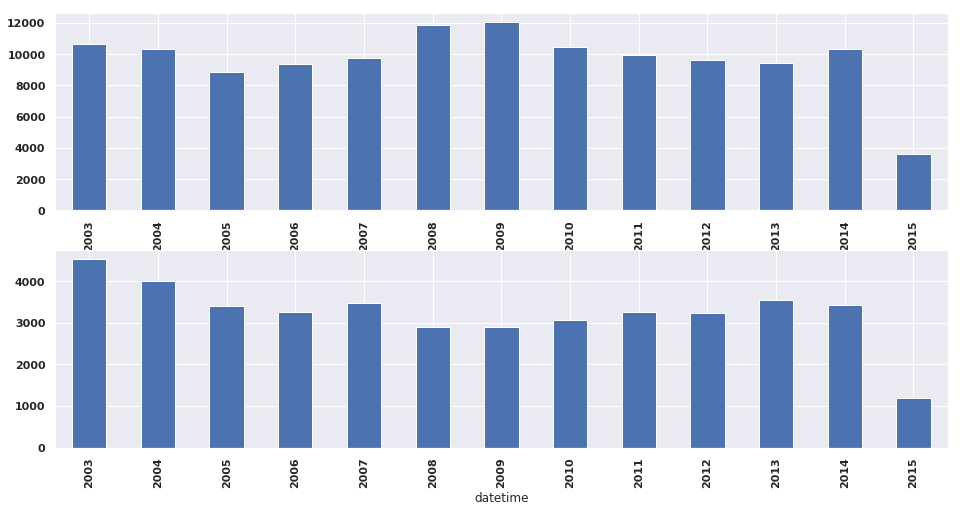

In [301]:

# fig, ax = plt.subplots(nrows=40, ncols=1, figsize=(16,60))
# def plotbycol_date(df, col, title):    
#     fig.suptitle(title)
#     idx = 1
#     for category in df['Category'].unique():
#         data = df[df['Category'] == category]
#         data['datetime'] = data['Date'].astype('datetime64')
#         data['datetime'].groupby(data['datetime'].dt.year).count().plot(kind='bar', ax=ax[idx])
#         print("idx ", idx, " category", category)
#         idx += 1
#     plt.show()    

# plotbycol2(df, 'Date', "Incidents by time")

fig, ax = plt.subplots(2, 1, figsize=(16,8))

data = train[train['Category'] == "OTHER OFFENSES"]
data['datetime'] = data['Date'].astype('datetime64')
data['datetime'].groupby(data['datetime'].dt.year).count().plot(kind='bar', ax=ax[0])

data = train[train['Category'] == "WARRANTS"]
data['datetime'] = data['Date'].astype('datetime64')
data['datetime'].groupby(data['datetime'].dt.year).count().plot(kind='bar', ax=ax[1])
plt.show()


In [302]:
if 'Dates' in train:
    train = train.drop(['Dates'], axis=1)
if 'Date' in train:
    train = train.drop(['Date'], axis=1)
    
if 'Dates' in test:
    test = test.drop(['Dates'], axis=1)
if 'Date' in test:
    test = test.drop(['Date'], axis=1)
    

In [303]:
train.head()

,Category,DayOfWeek,PdDistrict,X,Y,Hour,DoWN
0,WARRANTS,Wednesday,NORTHERN,-122.425892,37.774599,23,2
1,OTHER OFFENSES,Wednesday,NORTHERN,-122.425892,37.774599,23,2
2,OTHER OFFENSES,Wednesday,NORTHERN,-122.424363,37.800414,23,2
3,LARCENY/THEFT,Wednesday,NORTHERN,-122.426995,37.800873,23,2
4,LARCENY/THEFT,Wednesday,PARK,-122.438738,37.771541,23,2


In [304]:
test.head()

,Id,DayOfWeek,PdDistrict,X,Y,Hour
0,0,Sunday,BAYVIEW,-122.399588,37.735051,23
1,1,Sunday,BAYVIEW,-122.391523,37.732432,23
2,2,Sunday,NORTHERN,-122.426002,37.792212,23
3,3,Sunday,INGLESIDE,-122.437394,37.721412,23
4,4,Sunday,INGLESIDE,-122.437394,37.721412,23


In [305]:
# mapping = { 'Monday':0, 'Tuesday':1, 'Wednesday':2,  'Thursday':3, 'Friday':4, 'Saturday':5, 'Sunday':6}
def expand_category_values(df):
    df = pd.get_dummies(df, columns=['DayOfWeek'], prefix='Week')
    df = pd.get_dummies(df, columns=['PdDistrict'], prefix='District')
    df = pd.get_dummies(df, columns=['Hour'], prefix='Hour')
    return df
train = expand_category_values(train)
test = expand_category_values(test)

In [306]:
if 'DoWN' in train:
    train = train.drop(['DoWN'], axis=1)
train.head()

if 'DoWN' in test:
    test = test.drop(['DoWN'], axis=1)
train.head()

,Category,X,Y,Week_Friday,Week_Monday,Week_Saturday,Week_Sunday,Week_Thursday,Week_Tuesday,Week_Wednesday,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,WARRANTS,-122.425892,37.774599,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,OTHER OFFENSES,-122.425892,37.774599,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,OTHER OFFENSES,-122.424363,37.800414,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,LARCENY/THEFT,-122.426995,37.800873,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,LARCENY/THEFT,-122.438738,37.771541,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [307]:
test.head()

,Id,X,Y,Week_Friday,Week_Monday,Week_Saturday,Week_Sunday,Week_Thursday,Week_Tuesday,Week_Wednesday,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,0,-122.399588,37.735051,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,-122.391523,37.732432,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,-122.426002,37.792212,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,-122.437394,37.721412,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,-122.437394,37.721412,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### 데이터 정리/입출력 생성

In [308]:
test_ids = test['Id'].astype('int')

In [309]:
if "Id" in test:
    test = test.drop(['Id'], axis=1)

In [310]:
print(train.columns)
print(test.columns)

Index(['Category', 'X', 'Y', 'Week_Friday', 'Week_Monday', 'Week_Saturday',
       'Week_Sunday', 'Week_Thursday', 'Week_Tuesday', 'Week_Wednesday',
       'District_BAYVIEW', 'District_CENTRAL', 'District_INGLESIDE',
       'District_MISSION', 'District_NORTHERN', 'District_PARK',
       'District_RICHMOND', 'District_SOUTHERN', 'District_TARAVAL',
       'District_TENDERLOIN', 'Hour_0', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4',
       'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11',
       'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17',
       'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23'],
      dtype='object')
Index(['X', 'Y', 'Week_Friday', 'Week_Monday', 'Week_Saturday', 'Week_Sunday',
       'Week_Thursday', 'Week_Tuesday', 'Week_Wednesday', 'District_BAYVIEW',
       'District_CENTRAL', 'District_INGLESIDE', 'District_MISSION',
       'District_NORTHERN', 'District_PARK', 'District_RICHMOND',
       'District_SOUTHERN', 

In [311]:
train.head()

,Category,X,Y,Week_Friday,Week_Monday,Week_Saturday,Week_Sunday,Week_Thursday,Week_Tuesday,Week_Wednesday,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,WARRANTS,-122.425892,37.774599,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,OTHER OFFENSES,-122.425892,37.774599,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,OTHER OFFENSES,-122.424363,37.800414,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,LARCENY/THEFT,-122.426995,37.800873,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,LARCENY/THEFT,-122.438738,37.771541,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [312]:
test.head()

,X,Y,Week_Friday,Week_Monday,Week_Saturday,Week_Sunday,Week_Thursday,Week_Tuesday,Week_Wednesday,District_BAYVIEW,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,-122.399588,37.735051,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,-122.391523,37.732432,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,-122.426002,37.792212,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-122.437394,37.721412,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-122.437394,37.721412,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [313]:
train_X = train.drop(['Category'], axis=1).values
train_category = train['Category']
print(train_X.shape)

(878049, 43)


In [314]:
#train_Y = train_category.values.reshape(-1, 1)
train_Y = pd.get_dummies(train_category, columns=['Category'], prefix='Cat').values
print(train_Y)
print(train_Y.shape)

[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(878049, 39)


In [319]:
import keras
from keras import layers, models

from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import StratifiedKFold

train_X = train_X.astype(np.float32)
train_Y = train_Y.astype(np.float32)
print(train_X.shape)
print(train_Y.shape)
output_size = train_Y.shape[1]

print(test.shape)

class SimpleNN(models.Sequential):
    def __init__(self, input_shape):
        super().__init__()
        
        self.add(layers.Dense(units=160, activation='relu', input_shape=input_shape))
        self.add(layers.BatchNormalization())
        
        self.add(layers.Dense(units=120, activation='relu', input_shape=input_shape))
        self.add(layers.BatchNormalization())
        
        self.add(layers.Dense(units=80, activation='relu', input_shape=input_shape))
        self.add(layers.BatchNormalization())
        
        self.add(layers.Dense(units=output_size, activation='softmax'))
        
        self.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

batch_size = 10000
epochs = 1


kfold = KFold(n_splits=2, shuffle=True, random_state=7)

cvscores = []
models = []
for _train, _test in kfold.split(train_X, train_Y):
    model = SimpleNN(input_shape=(train_X.shape[1],))
    history = model.fit(train_X[_train], train_Y[_train], epochs=epochs, batch_size=batch_size, verbose=1)
    #evaluate model:
    scores = model.evaluate(train_X[_test], train_Y[_test], verbose=1)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    models.append(model)

print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
maxidx = np.argmax(cvscores)
print("Max : [", maxidx, "] : ", "{0:.2f}".format(cvscores[maxidx]))

pred = models[maxidx].predict(test, batch_size=test.shape[0], verbose=0)
p = np.argmax(pred, axis=1)
pred = np.eye(pred.shape[1])[p]
pred = pred.astype('int')
#pred = np.argmax(pred)

# test_predict_result=test_predict_result.astype(np.int32)

columns = np.sort(train_category.unique())
submission = pd.DataFrame(pred, index=test.index, columns=columns)
submission.to_csv('submission.csv', index=True, index_label="Id")


(878049, 43)
(878049, 39)
(884262, 43)
Epoch 1/1
439025/439025 [==============================] - 48s 109us/step
acc: 19.83%
Epoch 1/1
439024/439024 [==============================] - 52s 119us/step
acc: 19.91%
19.87% (+/- 0.04%)
Max : [ 1 ] :  19.91


In [316]:
np.sort(train_category.unique())

array(['ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY',
       'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE',
       'DRUG/NARCOTIC', 'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION',
       'FAMILY OFFENSES', 'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING',
       'KIDNAPPING', 'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING',
       'MISSING PERSON', 'NON-CRIMINAL', 'OTHER OFFENSES',
       'PORNOGRAPHY/OBSCENE MAT', 'PROSTITUTION', 'RECOVERED VEHICLE',
       'ROBBERY', 'RUNAWAY', 'SECONDARY CODES', 'SEX OFFENSES FORCIBLE',
       'SEX OFFENSES NON FORCIBLE', 'STOLEN PROPERTY', 'SUICIDE',
       'SUSPICIOUS OCC', 'TREA', 'TRESPASS', 'VANDALISM', 'VEHICLE THEFT',
       'WARRANTS', 'WEAPON LAWS'], dtype=object)

In [318]:
p = np.argmax(pred, axis=1)
p = np.eye(39)[p]
print(p)
print(len(test))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
884262
